<a href="https://colab.research.google.com/github/MorshedulHoque/Regression-Metrics/blob/main/Regression_Metrics_%7C_MSE%2C_MAE_%26_RMSE_%7C_R2_Score_%26_Adjusted_R2_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/package.csv')

In [10]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

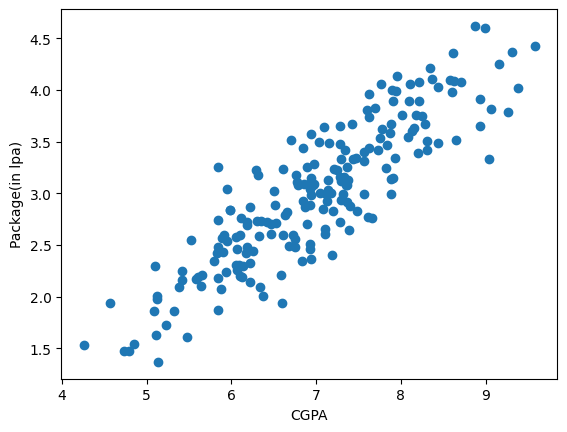

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [13]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

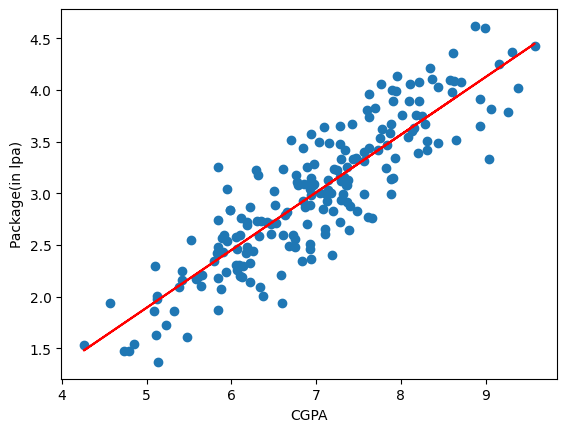

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
y_pred = lr.predict(X_test)

In [21]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [22]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [23]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [24]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [25]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [26]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [27]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [28]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.867412,3.26
1,5.12,0.636105,1.98
2,7.82,0.130909,3.25
3,7.42,0.322169,3.67
4,6.94,0.280925,3.57


Text(0, 0.5, 'Package(in lpa)')

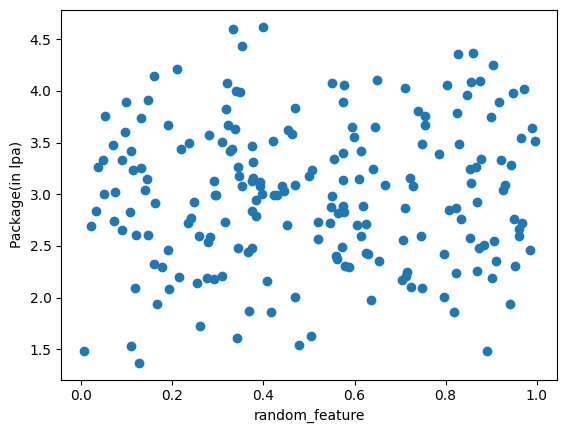

In [29]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [30]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

In [35]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7806071715408398


In [36]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7687480997322366

In [37]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [38]:
new_df2.sample(5)

,cgpa,iq,package
189,8.11,3.76,4.06
53,6.47,2.11,2.61
185,6.31,4.18,3.18
132,5.84,2.58,2.48
152,7.37,2.28,3.08


Text(0, 0.5, 'Package(in lpa)')

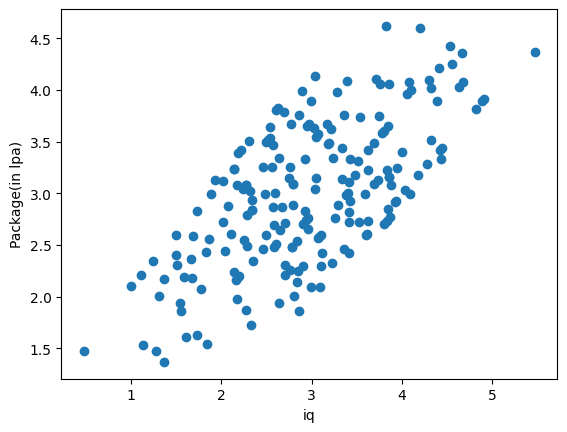

In [39]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [40]:
np.random.randint(-100,100)

-65

In [41]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.823951314856781


In [45]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8144351697139043